
Assignment Title (Lab 3) : Predictive Modeling for Insurance Claims
NAME: BUSINGYE CAROLINE

REG. NO.: 2023/HD05/04657U

STUDENT NO.: 230004657

MASTER OF SCIENCE IN COMPUTER SCIENCE - (MCSC)
---



Objective: Build a predictive model to determine if a building will have an insurance claim during a specific period using building characteristics. In this assignment, you will explore and apply four machine learning algorithms: Support Vector Machine (SVM), Linear Regression, k-nearest Neighbors (KNN), and Naive Bayes. The evaluation metric for this assignment is the Area Under the Curve (AUC).

Variable Description
Customer Id Identification number for the Policy holder
YearOfObservation year of observation for the insured policy
Insured_Period duration of insurance policy in Olusola Insurance. (Ex: Full year insurance, Policy Duration = 1; 6 months = 0.5
Residential is the building a residential building or not
Building_Painted is the building painted or not (N-Painted, V-Not Painted)
Building_Fenced is the building fence or not (N-Fenced, V-Not Fenced)
Garden building has garden or not (V-has garden O-no garden) Settlement Area where the building is located. (R- rural area U- urban area) Building Dimension Size of the insured building in m2
Building_Type The type of building (Type 1, 2, 3, 4)
Date_of_Occupancy date building was first occupied
NumberOfWindows number of windows in the building
Geo Code Geographical Code of the Insured building
Claim target variable. (0: no claim, 1: at least one claim over insured period).

In [147]:

from google.colab import drive

In [148]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**importing important libraries**

In [149]:
# Importing important packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from IPython.display import VimeoVideo
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import RocCurveDisplay,roc_curve

**loading the data set**

In [150]:
dft = pd.read_csv('/content/drive/MyDrive/MachineLearning/ML Lab/dataset/train_data.csv')


**displaying the first 10 rows of the dataset**

In [151]:

#viewing the first five rows of the dataset
dft.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,N,V,V,U,290.0,1,1960.0,.,1053,0
1,H2037,2015,1.0,0,V,N,O,R,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,N,V,V,U,595.0,1,1960.0,.,1053,0
3,H3834,2013,1.0,0,V,V,V,U,2840.0,1,1960.0,.,1053,0
4,H5053,2014,1.0,0,V,N,O,R,680.0,1,1800.0,3,1053,0


In [152]:
#displaying the shape of the dataset
dft.shape

(7160, 14)

**Getting  the  quick overview of the dataset**

In [153]:
dft.shape

(7160, 14)

**The dataset has 7160 columns and 14 rows**

In [154]:

#checking data types
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7153 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7054 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   6652 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7058 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


**This shows that out of the 14 columns, 3 contains float datatype, 4 has integer and 7 columns conatin strings as a datatype and that means there need for encoding the categorical variables**

**checking  for missing values  in the dataset**

In [155]:
dft.isnull().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

**The data set has missing values in some of the columns and hence they need to be treated to improve model perfomance**

**lets see total sum of   missing values**

In [156]:

dft.isnull().sum().sum()

723

**Having a total sum of 723 values has to be handled with carefully**

**displaying basic statistics**

In [157]:
dft.describe()

,YearOfObservation,Insured_Period,Residential,Building Dimension,Building_Type,Date_of_Occupancy,Claim
count,7160.000000,7160.000000,7160.000000,7054.000000,7160.000000,6652.000000,7160.000000
mean,2013.669553,0.909758,0.305447,1883.727530,2.186034,1964.456404,0.228212
std,1.383769,0.239756,0.460629,2278.157745,0.940632,36.002014,0.419709
min,2012.000000,0.000000,0.000000,1.000000,1.000000,1545.000000,0.000000
25%,2012.000000,0.997268,0.000000,528.000000,2.000000,1960.000000,0.000000
50%,2013.000000,1.000000,0.000000,1083.000000,2.000000,1970.000000,0.000000
75%,2015.000000,1.000000,1.000000,2289.750000,3.000000,1980.000000,0.000000
max,2016.000000,1.000000,1.000000,20940.000000,4.000000,2016.000000,1.000000


In [158]:
#displaying basic key statistics
dft.describe(include=object)

,Customer Id,Building_Painted,Building_Fenced,Garden,Settlement,NumberOfWindows,Geo_Code
count,7160,7160,7160,7153,7160,7160,7058
unique,7160,2,2,2,2,11,1307
top,H14663,V,N,O,R,.,6088
freq,1,5382,3608,3602,3610,3551,143


In [159]:
dft.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [160]:
dft.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  7
Settlement              0
Building Dimension    106
Building_Type           0
Date_of_Occupancy     508
NumberOfWindows         0
Geo_Code              102
Claim                   0
dtype: int64

The variable Garden has 7 missing values, Building Dimension has 106, Date_of_occupancy has 508 and Geo_code has 102 missing values.


In [161]:
dft.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [162]:
# Handling missing values,
# i will use mode for categoerical columns and median for numerical since some varriables are skewed
dft['Date_of_Occupancy']=dft['Date_of_Occupancy'].fillna(dft['Date_of_Occupancy'].median())
dft['Building Dimension']=dft['Building Dimension'].fillna(dft['Building Dimension'].median())
dft['Garden']=dft['Garden'].fillna(dft['Garden'].mode().iloc[0])
dft['Geo_Code'] = dft['Geo_Code'].fillna(dft['Geo_Code'].mode().iloc[0])
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         7160 non-null   object 
 1   YearOfObservation   7160 non-null   int64  
 2   Insured_Period      7160 non-null   float64
 3   Residential         7160 non-null   int64  
 4   Building_Painted    7160 non-null   object 
 5   Building_Fenced     7160 non-null   object 
 6   Garden              7160 non-null   object 
 7   Settlement          7160 non-null   object 
 8   Building Dimension  7160 non-null   float64
 9   Building_Type       7160 non-null   int64  
 10  Date_of_Occupancy   7160 non-null   float64
 11  NumberOfWindows     7160 non-null   object 
 12  Geo_Code            7160 non-null   object 
 13  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 783.2+ KB


 All the missing values have been handled since all variables have total count of 7160

**Data distribution**

In [163]:
dft.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [164]:
#displaying the statistics of Building dimension
dft['Building Dimension'].describe()

count     7160.000000
mean      1871.873184
std       2263.296186
min          1.000000
25%        531.500000
50%       1083.000000
75%       2250.000000
max      20940.000000
Name: Building Dimension, dtype: float64

The Building Dimension column has outliers. For example, the max value is 20940.000000,while its min value is 1.000000. The mean is sensitive to outliers, but the fact the mean is so small compared to the max value indicates the max value is an outlier.

In [165]:
#displaying the statistics ofdate of occupancy
dft['Date_of_Occupancy'].describe()

count    7160.000000
mean     1964.849721
std        34.730347
min      1545.000000
25%      1960.000000
50%      1970.000000
75%      1980.000000
max      2016.000000
Name: Date_of_Occupancy, dtype: float64

In [166]:
import plotly.express as px

In [167]:
#create a box plot to visualize the outlier in the Building Dimension
fig = px.box(dft, y='Building Dimension')
fig.update_layout(height=400, width=500, title_text='Distribution of Building Dimension')
fig.show()

In [168]:
#create a box plot to visualize the outlier in the Building Dimension
fig = px.box(dft, y='Date_of_Occupancy')
fig.update_layout(height=400, width=500, title_text='Distribution of Building Dimension')
fig.show()

this visually tells us that there are outliers since building dimension skews from the left and date of occupancy skews from the left

Dealing with outliers using cap method

In [169]:
#To cap the outliers, calculate a upper limit and lower limit.
upper_limit = dft['Building Dimension'].mean() + 0.7*dft['Building Dimension'].std()
lower_limit = dft['Building Dimension'].mean() - 0.7*dft['Building Dimension'].std()
print('Upper_limit:',upper_limit)
print('Lower_limit:',lower_limit)

Upper_limit: 3456.1805144593
Lower_limit: 287.56585425578396


In [170]:
import numpy as np
#we use the numpy .where() function to apply the limits to Building Dimension.
dft['Building Dimension'] = np.where(dft['Building Dimension'] > upper_limit,upper_limit,
np.where(dft['Building Dimension'] < lower_limit,lower_limit,dft['Building Dimension']))

In [171]:
#displaying the new  statistics of Building Dimension after removing outliers
dft.describe()[['Building Dimension']]

,Building Dimension
count,7160.000000
mean,1480.977883
std,1109.388848
min,287.565854
25%,531.500000
50%,1083.000000
75%,2250.000000
max,3456.180514


Wow,this is okay now the max value is has been decreased to 3456.180514 and min

---

value has increased  to 287.565854, and the mean value is now 1490.370464. This shows the outlier has been delt with.

newly visualisation of building dimension after removing outliers

In [172]:
def plot_variable(dft,variable):
  plt.figure(figsize = (16,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(dft[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of Building Dimension')
  plt.xlabel('Building Dimension')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(dft[variable])
  plt.title('A boxplot for the distribution of Building Dimension')
  plt.xlabel('Building Dimension')
  plt.ylabel('Frequency')
  plt.show()


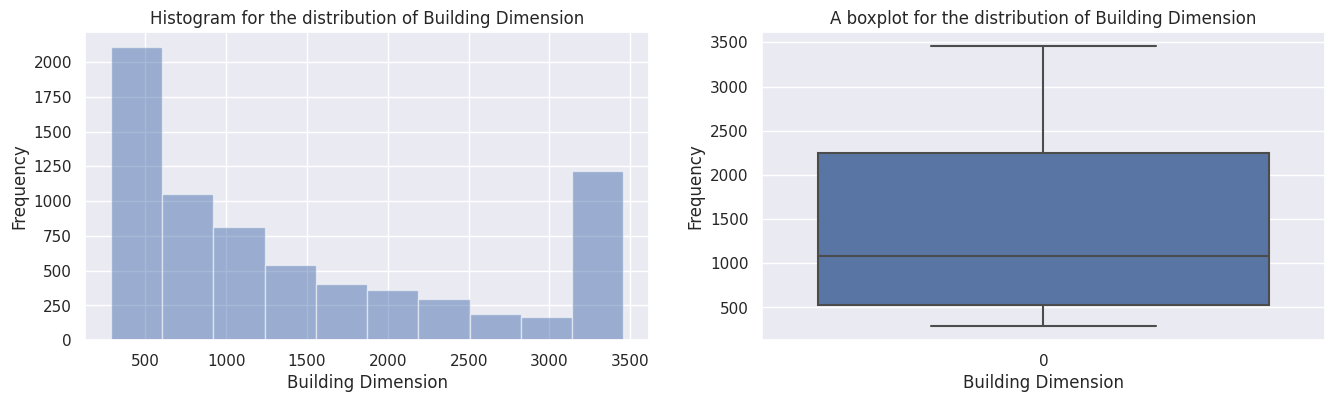

In [173]:
plot_variable(dft,'Building Dimension')

**visualisation of outliers from the date of occupancy**

In [174]:

def plot_variable(dft,variable):
  plt.figure(figsize = (10,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(dft[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of date of occupancy')
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(dft[variable])
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  plt.title('A boxplot for the distribution of date of occupancy')
  plt.show()

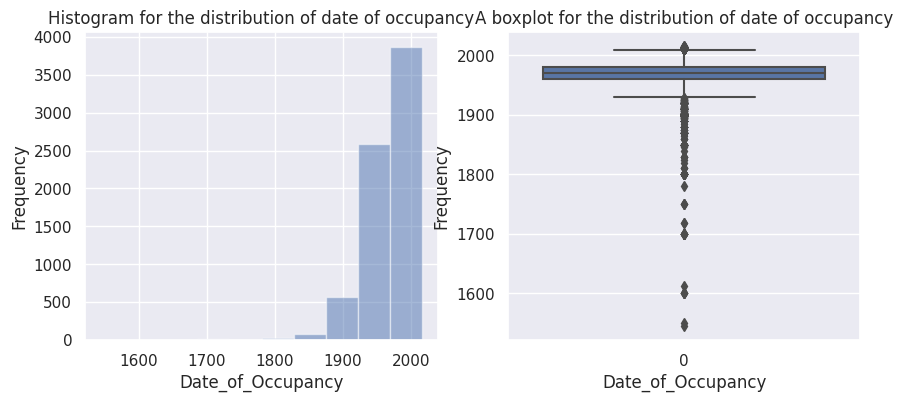

In [175]:
plot_variable(dft,'Date_of_Occupancy')

dealing with outliers from the date of occupancy

In [176]:
# using the Z score method to deal with outliers in  the Date_of_Occupancy variable
upper_limit = dft['Date_of_Occupancy'].mean() + 2.5*dft['Date_of_Occupancy'].std()
lower_limit = dft['Date_of_Occupancy'].mean() - 2.5*dft['Date_of_Occupancy'].std()

In [177]:
print('Upper_limit:',upper_limit)
print('Lower_limit:',lower_limit)

Upper_limit: 2051.6755879533193
Lower_limit: 1878.0238533874629


In [178]:
#  trimming  the outliers
dfnew = dft.loc[(dft['Date_of_Occupancy']<upper_limit) & (dft['Date_of_Occupancy']>lower_limit)]
print('old dataframe:',len(dft))
print('new dataframe:',len(dfnew))
print('outliers:',len(dft)-len(dft))

old dataframe: 7160
new dataframe: 7025
outliers: 0


now some columns have been trimmed

visualisation of the date of occupancy column without outliers

In [179]:
def plot_variable(df,variable):
  plt.figure(figsize = (10,4))
  # histogram
  plt.subplot(1,2,1)
  plt.hist(df[variable], alpha = 0.5)
  plt.title('Histogram for the distribution of date of occupancy')
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.xlabel('Date_of_Occupancy')
  plt.ylabel('Frequency')
  plt.title('A boxplot for the distribution of date of occupancy')
  plt.show()

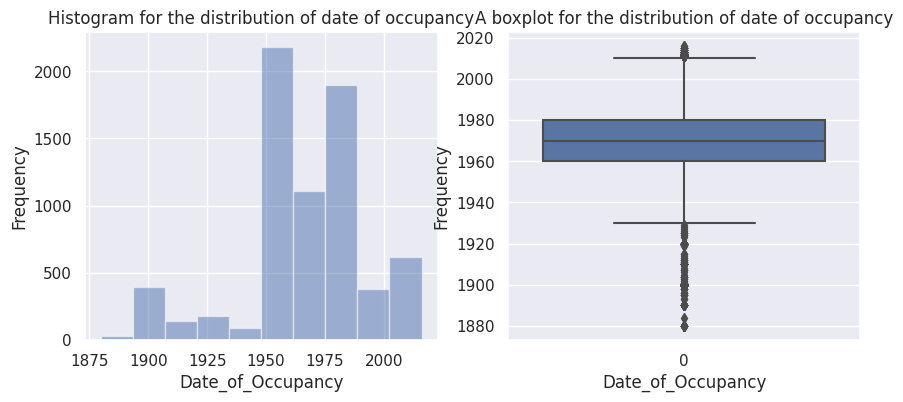

In [180]:
plot_variable(dfnew,'Date_of_Occupancy')

In [181]:
dft.isnull().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

**The dataset now has  no missing values ,good to go**

**Distribution of the target varriable Claim**

In [182]:
dft['Claim'].value_counts()

0    5526
1    1634
Name: Claim, dtype: int64

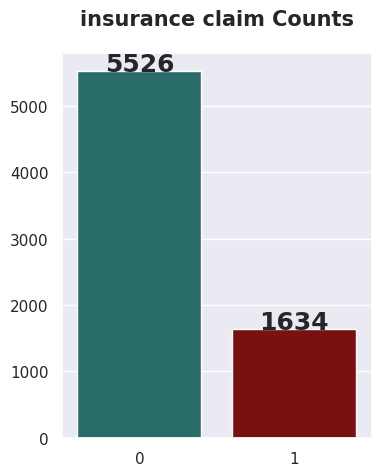

In [183]:
# visualising  distribution for target variable
plt.figure(figsize=(4,5))
claim_rate =dft["Claim"].value_counts()
sns.barplot(x=claim_rate.index,y=claim_rate.values,palette=["#1d7874","#8B0000"])
plt.title("insurance claim Counts",fontweight="black",size=15,pad=20)
for i, v in enumerate(claim_rate.values):
    plt.text(i, v, v,ha="center", fontweight='black', fontsize=18)


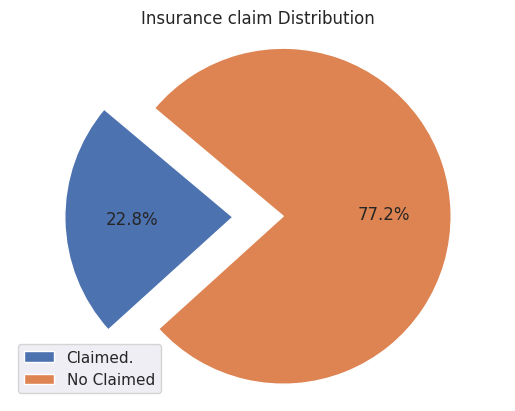

In [184]:
# Sample data (replace with your actual data)
labels = ['Claimed.', 'No Claimed']
values = [dft["Claim"].sum(), len(dft) - dft["Claim"].sum()]
# Create a pie chart with labeled segments
plt.pie(values, autopct='%1.1f%%', startangle=140,explode=[0.3,0])
plt.title("Insurance claim Distribution")

plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular
plt.legend(labels=labels, loc='lower left')
plt.show()

**77.2% of customer did not issue and insurance claim 22.8% of customers issued an insuarance claim this shows that The target varriable is highly imbalanced with 0(no claims) much higher than the 1(atleast one claim over insured period ) meaning it will further require to be balanced using some machine learning aligorithms  **

**visualising the categorical values distribution**

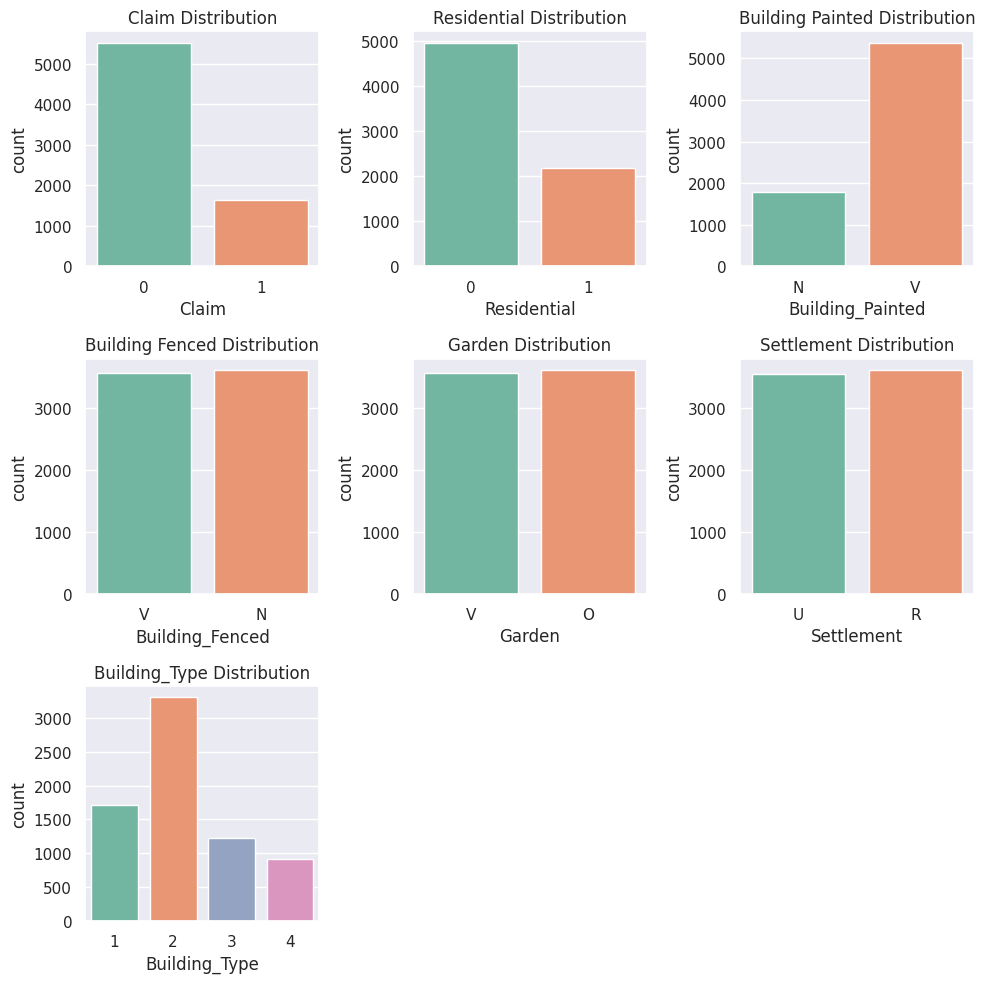

In [185]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
sns.set_theme(style="darkgrid")
# Plot the Claim distribution
sns.countplot(data=dft, x='Claim', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Claim Distribution')

# Plot the Residential distribution
sns.countplot(data=dft, x='Residential', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Residential Distribution')


# Plot the Building Painted distribution
sns.countplot(data=dft, x='Building_Painted', ax=axes[0, 2], palette='Set2')
axes[0, 2].set_title('Building Painted Distribution')

# Plot the Building Fenced distribution
sns.countplot(data=dft, x='Building_Fenced', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Building Fenced Distribution')

#Plot the Garden distribution
sns.countplot(data=dft, x='Garden', ax=axes[1, 1],palette='Set2')
axes[1, 1].set_title('Garden Distribution')

# Plot the Settlement distribution
sns.countplot(data=dft, x='Settlement', ax=axes[1, 2],palette='Set2')
axes[1, 2].set_title('Settlement Distribution')

#Plot the Building_Type distribution
sns.countplot(data=dft, x='Building_Type', ax=axes[2, 0],palette='Set2')
axes[2, 0].set_title('Building_Type Distribution')


#Plot the Insured_Period distribution
#sns.countplot(data=df, x='Insured_Period', ax=axes[2, 1],palette='Set3')
#axes[2, 1].set_title('Insured_Period Distribution')

#Plot the Building_Type distribution
#sns.countplot(data=df, x='Building_Type', ax=axes[2, 1],palette='Set3')
#axes[2, 1].set_title('Building_Type Distribution')

fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**visualising the continous varriables**

In [186]:
numerical_cont=['Building Dimension','Date_of_Occupancy']

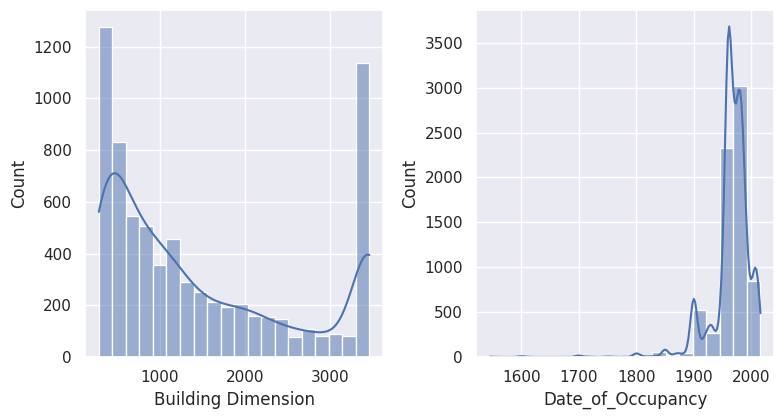

In [187]:
plt.figure(figsize=(8, 8))
for i, column in enumerate(numerical_cont, 1):
    plt.subplot(2, 2, i)
    sns.histplot(dft[column], bins=20, kde = True)
plt.tight_layout()
plt.show()

**There are outliers in Building dimension columns the fact its skewed to the left as well in the data_of_occupancy since its  right skewing**

**Distribution of   categorical variables with respect to claim (target varriable)**

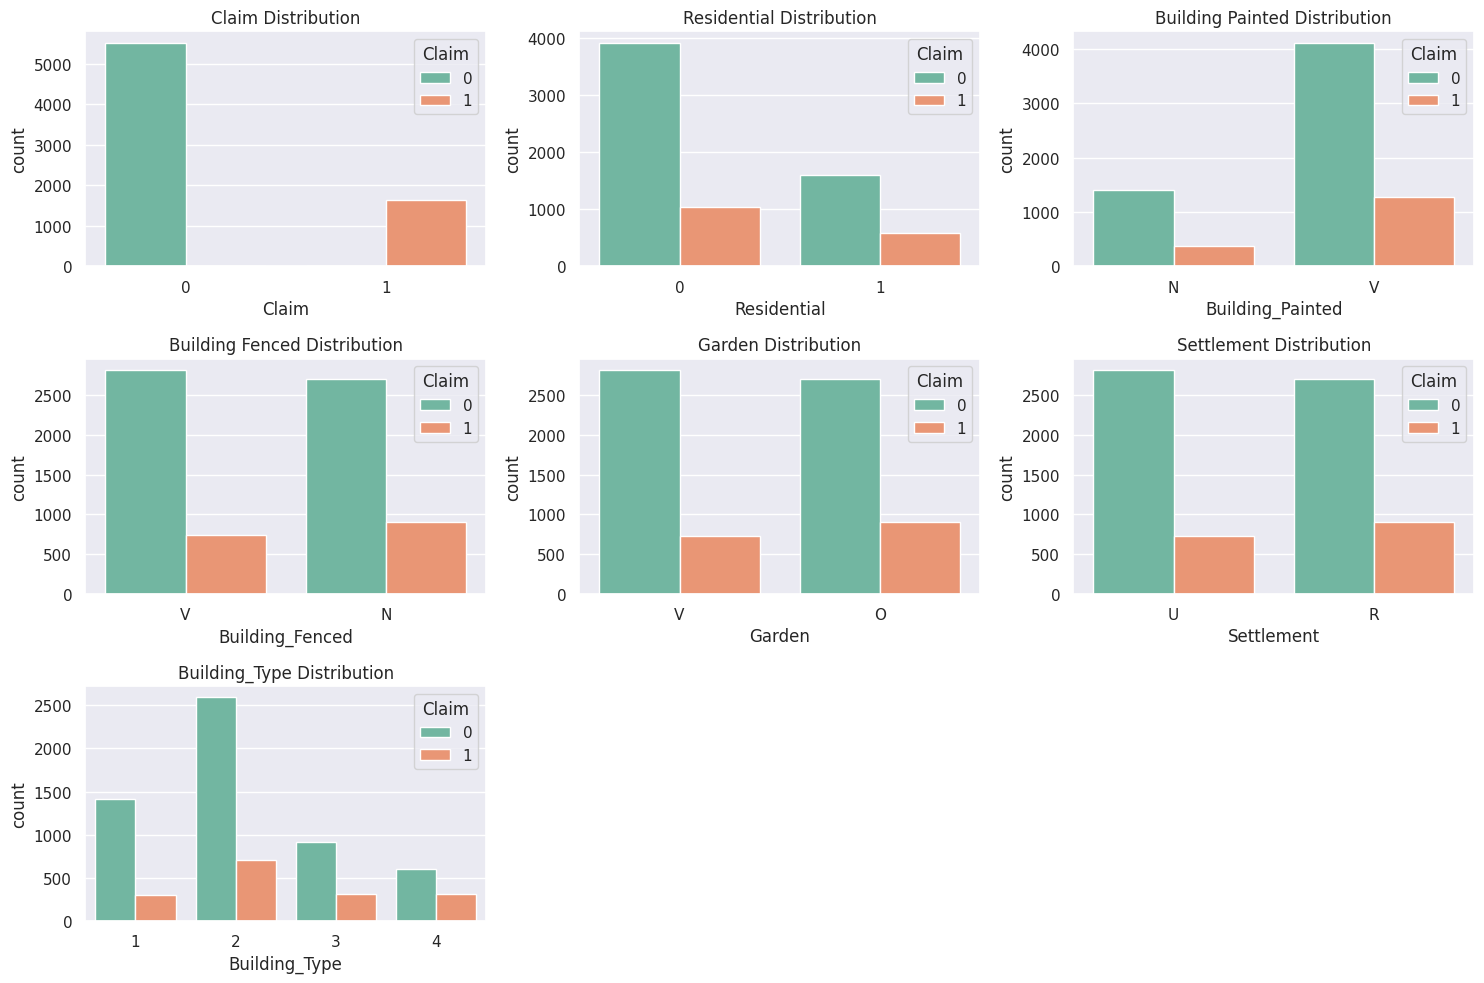

In [188]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
sns.set_theme(style="darkgrid")
# Plot the Claim distribution
sns.countplot(data=dft, x='Claim', ax=axes[0, 0], hue = 'Claim', palette='Set2')
axes[0, 0].set_title('Claim Distribution')

# Plot the Residential distribution
sns.countplot(data=dft, x='Residential', ax=axes[0, 1], hue = 'Claim',palette='Set2')
axes[0, 1].set_title('Residential Distribution')


# Plot the Building Painted distribution
sns.countplot(data=dft, x='Building_Painted', ax=axes[0, 2], hue = 'Claim',palette='Set2')
axes[0, 2].set_title('Building Painted Distribution')
# Plot the Building Fenced distribution
sns.countplot(data=dft, x='Building_Fenced', ax=axes[1, 0], hue = 'Claim',palette='Set2')
axes[1, 0].set_title('Building Fenced Distribution')

#Plot the Garden distribution
sns.countplot(data=dft, x='Garden', ax=axes[1, 1], hue = 'Claim',palette='Set2')
axes[1, 1].set_title('Garden Distribution')

# Plot the Settlement distribution
sns.countplot(data=dft, x='Settlement', ax=axes[1, 2], hue = 'Claim',palette='Set2')
axes[1, 2].set_title('Settlement Distribution')

#Plot the Building_Type distribution
sns.countplot(data=dft, x='Building_Type', ax=axes[2, 0], hue = 'Claim',palette='Set2')
axes[2, 0].set_title('Building_Type Distribution')


#Plot the Insured_Period distribution
#sns.countplot(data=df, x='Insured_Period', ax=axes[2, 1],palette='Set3')
#axes[2, 1].set_title('Insured_Period Distribution')


fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


**Observations**


*   The non painted buildings have a higher insurance claim campared to the houses for the first bar graphpainted



*   The non fenced buildings have a higher insurance claim campared to the fensed houses
*   The buildings without gardens a higher insurance claim campared to those buildings with gardens

*   Buildings in the Urban Settlement have a low insurance claim as compared to those in rural setting






.

**Distribution of the target varriable with respect to continous varriable**

In [189]:
dft.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [190]:
figurecc=['Residential','Building Dimension','Building_Type','Date_of_Occupancy',]

In [191]:
list(enumerate(figurecc))

[(0, 'Residential'),
 (1, 'Building Dimension'),
 (2, 'Building_Type'),
 (3, 'Date_of_Occupancy')]

<Figure size 640x480 with 0 Axes>

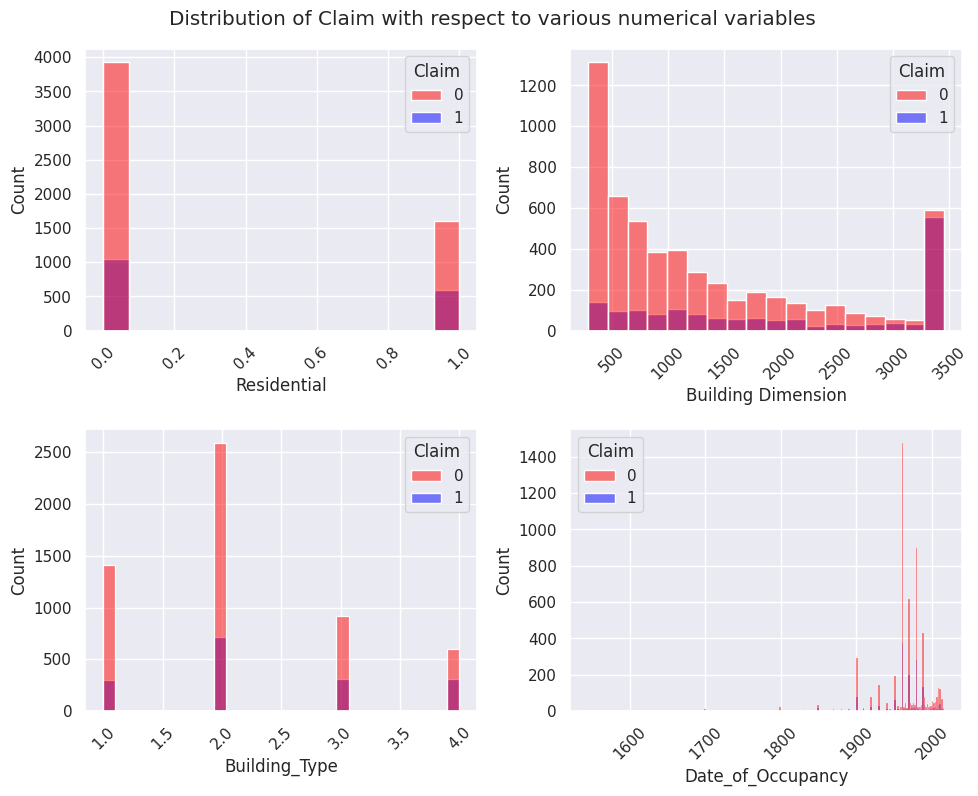

In [192]:

plt.suptitle("Distribution of Claim with respect to various numerical variables")
plt.figure(figsize=(10,8))
for i in enumerate(figurecc):
  plt.subplot(2,2,i[0]+1)
  plt.suptitle("Distribution of Claim with respect to various numerical variables")
  plt.tight_layout()
  sns.histplot(x=i[1], hue ='Claim', data = dft, palette=['red','blue'])
  plt.xticks(rotation = 45)

**observation**

There was a high insurance claim in the year 1960 according to Date of occupancy bar graph.

Buildings of dimensions between 500 to 2000 have a higher insurance claim

Non residential buildings have a higer insurance claim claim as compared to the residential buildings

Buildings with type number 2 have a hot a higher insurance claim as opposed to other number types**

---



**Data encoding**

In [193]:
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ["Building_Painted", "Building_Fenced", "Garden", "Settlement","NumberOfWindows",]
for column in categorical_columns:
    dft[column] = label_encoder.fit_transform(dft[column])
    print(dft)

     Customer Id  YearOfObservation  Insured_Period  Residential  \
0         H14663               2013        1.000000            0   
1          H2037               2015        1.000000            0   
2          H3802               2014        1.000000            0   
3          H3834               2013        1.000000            0   
4          H5053               2014        1.000000            0   
...          ...                ...             ...          ...   
7155       H5290               2012        1.000000            1   
7156       H5926               2013        1.000000            0   
7157       H6204               2016        0.038251            0   
7158       H6537               2013        1.000000            0   
7159       H7470               2014        1.000000            0   

      Building_Painted Building_Fenced Garden Settlement  Building Dimension  \
0                    0               V      V          U               290.0   
1                    1 

In [194]:
#displaying the encoded dataset
dft.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0,1053,0
1,H2037,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0,1053,0
3,H3834,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0,1053,0
4,H5053,2014,1.0,0,1,0,0,0,680.0,1,1800.0,3,1053,0


**feature selection (selecting the best features for the model)**

In [195]:
dft.head()

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code,Claim
0,H14663,2013,1.0,0,0,1,1,1,290.0,1,1960.0,0,1053,0
1,H2037,2015,1.0,0,1,0,0,0,490.0,1,1850.0,4,1053,0
2,H3802,2014,1.0,0,0,1,1,1,595.0,1,1960.0,0,1053,0
3,H3834,2013,1.0,0,1,1,1,1,2840.0,1,1960.0,0,1053,0
4,H5053,2014,1.0,0,1,0,0,0,680.0,1,1800.0,3,1053,0


In [196]:
dft.isna().sum()

Customer Id           0
YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Geo_Code              0
Claim                 0
dtype: int64

In [197]:
dft.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [279]:
dft = dft.drop(columns='Customer Id')

In [198]:
#Specification of independent and dependent variables of dataset 1
x= dft.drop(columns=['Claim','Customer Id','Geo_Code'])  # Features
y = dft['Claim']  # Target variable

In [199]:
#Feature selection using chi-squared statistics and ANOVA F-statistic
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Calculate chi-squared statistics for each feature
chi2_scores = chi2(x, y)[0]

# Calculate ANOVA F-statistic and p-values for each feature
f_scores = f_classif(x, y)[0]

# Combine chi-squared and ANOVA scores
combined_scores = chi2_scores + f_scores

feature_scores = pd.DataFrame({'Feature': x.columns, 'Combined_Score': combined_scores})
feature_scores = feature_scores.sort_values(by='Combined_Score', ascending=False)


In [200]:
feature_scores

,Feature,Combined_Score
7,Building Dimension,522649.321115
10,NumberOfWindows,525.044111
8,Building_Type,127.662465
1,Insured_Period,60.342299
2,Residential,49.046046
5,Garden,29.358813
6,Settlement,29.190635
4,Building_Fenced,28.779675
3,Building_Painted,7.971521
9,Date_of_Occupancy,3.653432


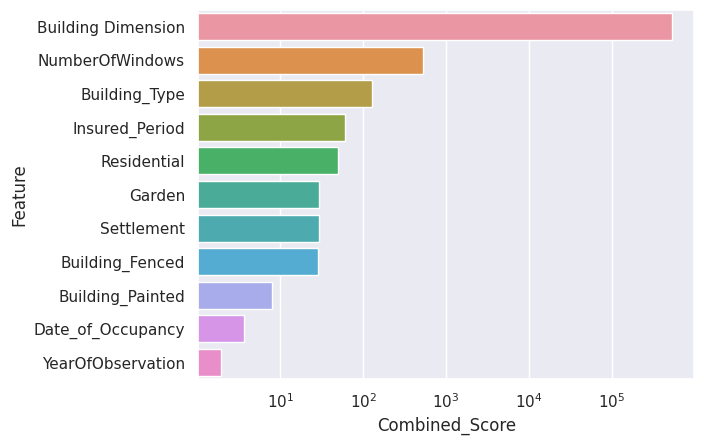

In [201]:
sns.barplot(feature_scores, y ='Feature', x ='Combined_Score')
plt.xscale('log')

From the graph,Building dimension is the most important variable because they have a higher chi2 score and a lower p-values from the graphs above

**spiltting the dataset into training and testing**

In [202]:
#splitting the dataset
from sklearn.model_selection import train_test_split

# Assuming dft is your DataFrame
features = ['YearOfObservation', 'Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building Dimension', 'Building_Type', 'Date_of_Occupancy']
target = "Claim"

X = dft[features]
y = dft[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scalling the data

In [203]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [204]:
X_train

array([[ 1.68333   ,  0.36173668,  1.52019165, ..., -0.56407555,
         1.945864  , -0.13677604],
       [ 0.96004486,  0.37325912, -0.6578118 , ...,  0.59556136,
        -0.19059546, -0.13677604],
       [-0.48652543,  0.37325912, -0.6578118 , ...,  1.10544062,
         0.87763427,  0.14963661],
       ...,
       [ 0.23675971,  0.37325912,  1.52019165, ...,  0.65422003,
         1.945864  , -1.74068689],
       [-1.20981057,  0.37325912,  1.52019165, ..., -0.75900284,
        -0.19059546, -0.13677604],
       [-1.20981057,  0.37325912,  1.52019165, ..., -1.07163928,
        -1.25882518, -0.42318869]])

In [205]:
X_test

array([[-1.20981057,  0.37325912, -0.6578118 , ..., -0.44856308,
        -0.19059546, -0.13677604],
       [-0.48652543,  0.37325912, -0.6578118 , ..., -0.8654909 ,
         0.87763427,  0.43604926],
       [-1.20981057, -1.5048997 ,  1.52019165, ...,  1.11717235,
         1.945864  ,  0.43604926],
       ...,
       [ 0.23675971,  0.37325912, -0.6578118 , ..., -0.69041731,
        -0.19059546,  1.09479836],
       [ 0.23675971,  0.37325912, -0.6578118 , ...,  0.84373268,
        -1.25882518,  0.66517938],
       [-1.20981057,  0.37325912, -0.6578118 , ..., -0.67146605,
        -0.19059546,  1.29528722]])

**Model Building**

**K-Nearest Neighbor(KNN) model**

In [206]:
from sklearn.neighbors import KNeighborsClassifier
# Create the K-nearest Neighbours Classifier and use the train dataset to train the model
#accuracy = np.zeros(20)
from sklearn.model_selection import train_test_split

# Assuming X and y are your features and target variable respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
#predicting the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Evaluating the K-nearest Neighbours model using classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1098
           1       0.38      0.25      0.30       334

    accuracy                           0.73      1432
   macro avg       0.59      0.56      0.57      1432
weighted avg       0.70      0.73      0.71      1432



**Accuracy is the overall correct predictions divided by the total number of predictions. The overall accuracy is 0.73, meaning that the model correctly predicted the class for 73% of the instances.**

hyperparameter tunning for KNN model

In [207]:
grid_params = { 'n_neighbors' : [2,6,10,12,20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [208]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [209]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [210]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


In [211]:
# find the best score
g_res.best_score_

0.777758427289856

In [212]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 10, 'weights': 'uniform'}

In [213]:
# use the best hyperparameters
g_res.best_params_
knn = KNeighborsClassifier(n_neighbors = 20, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_neighbors=20)

In [214]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

**model  evaluation**

In [215]:
print('Test set accuracy: ', accuracy_score(y_test, y_knn))
sc = accuracy_score(y_test, y_knn)

Test set accuracy:  0.7688547486033519


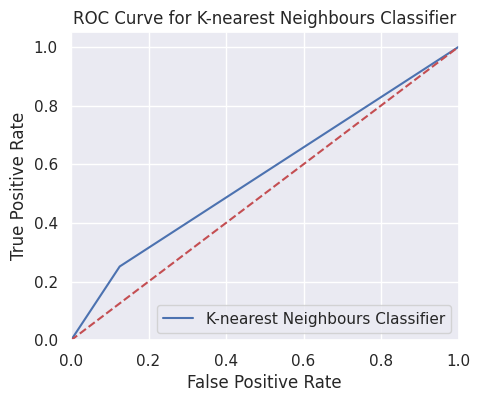

In [216]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
y_pred_= knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score_knn = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='K-nearest Neighbours Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for K-nearest Neighbours Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Naive Bayes**

In [217]:
# create the Naive Bayes' Classifier and use the train dataset to train the model
classifier=GaussianNB()
classifier.fit(X_train, y_train)

# predict the results of the model
y_predictnb=classifier.predict(X_test)
y_predict_proba = classifier.predict_proba(X_test)[:,1]

# Evaluating the model using classification report
print(classification_report(y_test,y_predictnb))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1098
           1       0.48      0.35      0.40       334

    accuracy                           0.76      1432
   macro avg       0.65      0.62      0.63      1432
weighted avg       0.74      0.76      0.75      1432



Overall accuracy is 0.76, meaning that the model correctly predicts the class for about 76% of the instances.

**Tune hyparameters for Naive Bayes**

In [218]:
np.logspace(0,-9, num=10)

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09])

In [219]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

In [220]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer


In [221]:
# Assuming X_train and y_train are your training data
Data_transformed = PowerTransformer().fit_transform(X_train)

# Create the Naive Bayes model
model_NB = GaussianNB()

# Define the parameter grid
params_NB = {'var_smoothing': np.logspace(0, -9, num=100)}

# Create the GridSearchCV object
gs_NB = GridSearchCV(estimator=model_NB,
                     param_grid=params_NB,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')

# Fit the grid search to the data
gs_NB.fit(Data_transformed, y_train)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [222]:
gs_NB.best_params_

{'var_smoothing': 0.43287612810830584}

In [223]:
gs_NB.best_score_

0.7777009584632073

In [224]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

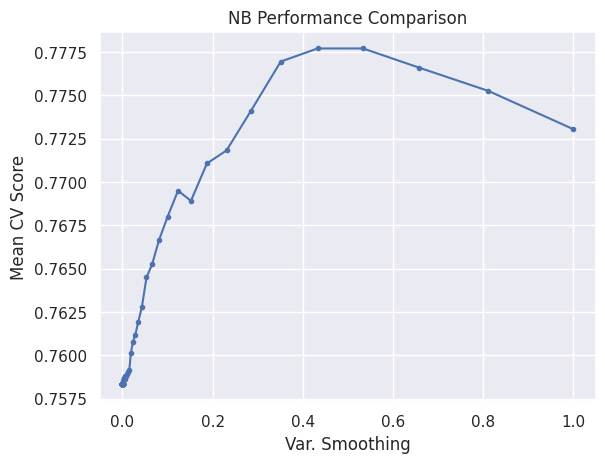

In [225]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [226]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

In [227]:
# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_train,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7805516759776536


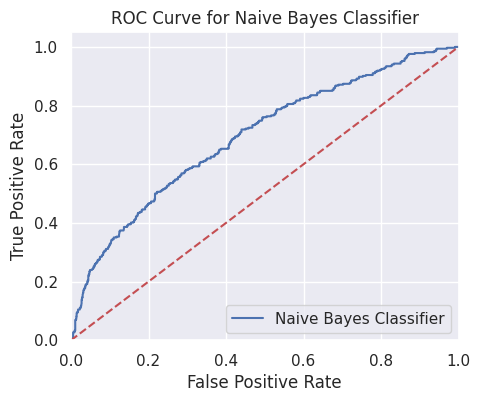

In [228]:
# Visualisation of the models's performance on an ROC/AUC curve
plt.figure(figsize=(5,4))
y_predictnb_proba = classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test,  y_predictnb_proba)
nb_roc_auc2=roc_auc_score(y_test,classifier.predict(X_test))
plt.plot(fpr, tpr, label='Naive Bayes Classifier')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.title('ROC Curve for Naive Bayes Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**Building a linear regression model**

In [229]:
#creating a model
from sklearn.linear_model import LinearRegression
# creating a object
model = LinearRegression()
#training the model
model.fit(X, y)
#using the training dataset for the prediction
pred = model.predict(X)
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y, pred)
r2 = r2_score(y, pred)#Best fit lineplt.scatter(x, y)
#plt.plot(X, pred, color = 'Black', marker = 'o')
#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , model.intercept_)
print("Slope :" , model.coef_)

Mean Squared Error :  0.15642165247898437
R-Squared : 0.11190386213358161
Y-intercept : 15.769650332048442
Slope : [-7.31012740e-03  1.50617893e-01  1.21455050e-02  1.35871411e-02
  7.74555714e-01 -8.63125528e-01  1.04176606e-01  1.17645573e-04
  4.74341059e-02 -6.40233514e-04]


The model's performance, as indicated by the R-squared value, is relatively low, suggesting that the linear regression model might not fully capture the underlying patterns in the data

**tuning hyperparameters to boost the model**





In [230]:
# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [231]:
from sklearn.model_selection import GridSearchCV
# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [232]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [233]:
# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [234]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [235]:
# Evaluate the model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 0.1592946570099467
Root Mean Squared Error (RMSE): 0.3991173474179576
R-squared (R2): 0.10928567254462418


**scaling **

In [236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_standardize = ['YearOfObservation','Building Dimension', 'Date_of_Occupancy']
X_train[columns_to_standardize] = scaler.fit_transform(X_train[columns_to_standardize])
X_test[columns_to_standardize] = scaler.transform(X_test[columns_to_standardize])

In [237]:
X_train.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
5266,1.683330,0.997268,1,0,1,1,1,-0.564076,4,-0.136776
5441,0.960045,1.000000,0,0,1,1,1,0.595561,2,-0.136776
7025,-0.486525,1.000000,0,1,0,0,0,1.105441,3,0.149637
7130,0.236760,1.000000,1,1,1,1,1,-0.353807,1,-7.583505
4454,-0.486525,1.000000,0,1,0,0,0,-0.356514,2,-0.136776


**building svm**

A support-vector machine constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.

In [238]:
#Import svm model
from sklearn import svm

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
#Fitting the model on SVC with default parameters
model_svc = SVC()

In [239]:
model_svc.fit(X_train, y_train)

SVC()

In [240]:
#Calculating predictions, and accuracy score
pred_svc = model_svc.predict( X_test)
svm = accuracy_score( y_test,pred_svc)
svm

0.7758379888268156

In [241]:
#Building classification report
print(classification_report( y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.78      0.99      0.87      1098
           1       0.65      0.08      0.15       334

    accuracy                           0.78      1432
   macro avg       0.72      0.54      0.51      1432
weighted avg       0.75      0.78      0.70      1432



The model performs well in predicting class 0 with high precision and recall. However, for class 1, the model has lower precision and recall, indicating challenges in correctly identifying instances of class 1. The low F1-score for class 1 suggests an imbalance between precision and recall. The overall accuracy is 77%, but it's crucial to consider the class-specific metrics, especially when dealing with imbalanced datasets.

**printing the confusion matrix**

In [242]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_svc)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1083   15]
 [ 306   28]]

True Positives(TP) =  1083

True Negatives(TN) =  28

False Positives(FP) =  15

False Negatives(FN) =  306


**printing the ROC curve**

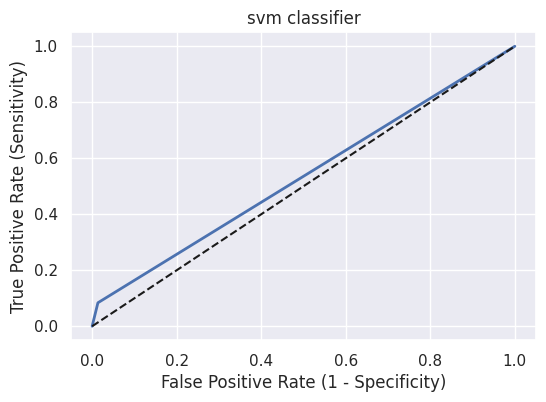

In [243]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, pred_svc)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('svm classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [244]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, pred_svc)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.5351


**Hyperparameter Tuning with GridSearchCV**

In [245]:
# Create a dictionary called param_grid and fill out some parameters for kernels, C and gamma
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


linear regression model

In [246]:
#creating a model
from sklearn.linear_model import LinearRegression
# creating a object
model = LinearRegression()
#training the model
model.fit(X_train, y_train)
#using the training dataset for the prediction
pred = model.predict(X_train)
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_train, pred)
r2 = r2_score(y_train, pred)#Best fit lineplt.scatter(x, y)
#plt.plot(X, pred, color = 'Black', marker = 'o')
#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , model.intercept_)
print("Slope :" , model.coef_)

Mean Squared Error :  0.1557552085514095
R-Squared : 0.11223578964484582
Y-intercept : -0.02427032893384104
Slope : [-0.00731654  0.13290718  0.01447958  0.02194295  0.77809728 -0.87700056
  0.11865     0.13176535  0.04560795 -0.02191915]


The model's performance, as indicated by the R-squared value, is relatively low, suggesting that the linear regression model might not fully capture the underlying patterns in the data

In [247]:
#Fit the model on the training data


tuning hyperparameters

In [248]:
# Define the parameter grid
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

In [249]:
from sklearn.model_selection import GridSearchCV
# Create the GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)


In [250]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [251]:
# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [252]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

In [253]:
# Evaluate the model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


In [254]:

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.1593924950181815
Root Mean Squared Error (RMSE): 0.3992398965762083
R-squared (R2): 0.10873860011080738


handling the test data

In [310]:
dftest = pd.read_csv('/content/drive/MyDrive/MachineLearning/ML Lab/dataset/test_data.csv')
dftest.head()


,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321


In [311]:
dftest2=dftest.copy()
dftest2

,Customer Id,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Geo_Code
0,H11920,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3,3310
1,H11921,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3,3310
2,H9805,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.,3310
3,H7493,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
4,H7494,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3,3321
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3064,H11583,2015,1.000000,0,V,V,V,U,NaN,4,1900.0,.,NaN
3065,H11720,2012,1.000000,0,V,V,V,U,NaN,2,1948.0,.,NaN
3066,H11721,2012,1.000000,0,V,V,V,U,NaN,2,1993.0,.,NaN
3067,H12408,2013,1.000000,0,V,V,V,U,NaN,1,1800.0,.,NaN


In [305]:
#displaying the columns in the dataset
dftest.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code'],
      dtype='object')

In [306]:
#displaying the first five rows
dftest.shape

(3069, 13)

In [307]:
#checking for missing values in the dataset
dftest.isna().sum()

Customer Id             0
YearOfObservation       0
Insured_Period          0
Residential             0
Building_Painted        0
Building_Fenced         0
Garden                  4
Settlement              0
Building Dimension     13
Building_Type           0
Date_of_Occupancy     728
NumberOfWindows         0
Geo_Code               13
dtype: int64

In [312]:
#Handling the missing values using imputation since the dataset is small
dftest = dftest
dftest['Building Dimension']=dftest['Building Dimension'].fillna(dftest['Building Dimension'].median())
dftest['Date_of_Occupancy']=dftest['Date_of_Occupancy'].fillna(dftest['Date_of_Occupancy'].median())
dftest['Garden']=dftest['Garden'].fillna(dftest['Garden'].mode().iloc[0])
dftest['Geo_Code']=dftest['Geo_Code'].fillna(dftest['Geo_Code'].mode().iloc[0])
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3069 entries, 0 to 3068
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer Id         3069 non-null   object 
 1   YearOfObservation   3069 non-null   int64  
 2   Insured_Period      3069 non-null   float64
 3   Residential         3069 non-null   int64  
 4   Building_Painted    3069 non-null   object 
 5   Building_Fenced     3069 non-null   object 
 6   Garden              3069 non-null   object 
 7   Settlement          3069 non-null   object 
 8   Building Dimension  3069 non-null   float64
 9   Building_Type       3069 non-null   int64  
 10  Date_of_Occupancy   3069 non-null   float64
 11  NumberOfWindows     3069 non-null   object 
 12  Geo_Code            3069 non-null   object 
dtypes: float64(3), int64(3), object(7)
memory usage: 311.8+ KB


In [315]:
columns_to_drop = ['NumberOfWindows','Geo_Code']
dftest = dftest.drop(columns=columns_to_drop, axis=1)

In [316]:
dftest.columns

Index(['Customer Id', 'YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')

In [317]:
dftest=dftest.drop(columns='Customer Id')
dftest

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
0,2013,1.000000,0,V,N,O,R,300.0,1,1960.0
1,2016,0.997268,0,V,N,O,R,300.0,1,1960.0
2,2013,0.369863,0,V,V,V,U,790.0,1,1960.0
3,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0
4,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0
...,...,...,...,...,...,...,...,...,...,...
3064,2015,1.000000,0,V,V,V,U,900.0,4,1900.0
3065,2012,1.000000,0,V,V,V,U,900.0,2,1948.0
3066,2012,1.000000,0,V,V,V,U,900.0,2,1993.0
3067,2013,1.000000,0,V,V,V,U,900.0,1,1800.0


label encoding

In [318]:
# Create a LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
categorical_columns = ["Building_Painted", "Building_Fenced", "Garden", "Settlement"]
for column in categorical_columns:
  dftest[column] = label_encoder.fit_transform(dftest[column])

In [319]:
dftest.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy
0,2013,1.000000,0,1,0,0,0,300.0,1,1960.0
1,2016,0.997268,0,1,0,0,0,300.0,1,1960.0
2,2013,0.369863,0,1,1,1,1,790.0,1,1960.0
3,2014,1.000000,0,1,0,0,0,1405.0,1,2004.0
4,2016,1.000000,0,1,0,0,0,1405.0,1,2004.0


In [320]:
dftest.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')

 **Making Model predictions**

In [321]:
dftest.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy'],
      dtype='object')

In [322]:
dft.columns

Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Geo_Code', 'Claim'],
      dtype='object')

In [323]:
features1 = ["Building Dimension","Insured_Period","Residential","Building_Fenced","Garden","Settlement","Building_Type","YearOfObservation","Date_of_Occupancy","Building_Painted"]
X_pred1 =dftest[features1]

In [324]:
X_pred1.head()

,Building Dimension,Insured_Period,Residential,Building_Fenced,Garden,Settlement,Building_Type,YearOfObservation,Date_of_Occupancy,Building_Painted
0,300.0,1.000000,0,0,0,0,1,2013,1960.0,1
1,300.0,0.997268,0,0,0,0,1,2016,1960.0,1
2,790.0,0.369863,0,1,1,1,1,2013,1960.0,1
3,1405.0,1.000000,0,0,0,0,1,2014,2004.0,1
4,1405.0,1.000000,0,0,0,0,1,2016,2004.0,1


**preparing submission files**

**Predictions for SVM model**

In [325]:
# Make predictions using the trained SVM model
predictions =model_svc.predict(dftest)

# Create a new DataFrame with the predictions
output_df = pd.DataFrame({'Predictions': predictions})

# Assuming dftest has a column named 'Customer ID'
customer_ids = dftest2["Customer Id"]

# Create a DataFrame with Customer ID and Predictions
output_df = pd.DataFrame({'Customer ID': customer_ids, 'Predictions': predictions})

# Print the predictions
print(output_df)



     Customer ID  Predictions
0         H11920            0
1         H11921            0
2          H9805            0
3          H7493            0
4          H7494            0
...          ...          ...
3064      H11583            0
3065      H11720            0
3066      H11721            0
3067      H12408            0
3068       H9021            0

[3069 rows x 2 columns]


In [326]:
# Save the predictions to a CSV file
output_df.to_csv('SVM_predictions_output.csv', index=False)

**Predictions for KNN model**

In [329]:
# Make predictions using the trained SVM model
predictions = knn.predict(dftest)
# Create a new DataFrame with the predictions
output_df = pd.DataFrame({'Predictions': predictions})
# Assuming df2 has a column named 'Customer ID'
customer_ids = dftest2["Customer Id"]
# Create a DataFrame with Customer ID and Predictions
output_df = pd.DataFrame({'Customer ID': customer_ids, 'Predictions': predictions})
# Print the predictions
print(output_df)


     Customer ID  Predictions
0         H11920            0
1         H11921            0
2          H9805            0
3          H7493            0
4          H7494            0
...          ...          ...
3064      H11583            0
3065      H11720            0
3066      H11721            0
3067      H12408            0
3068       H9021            0

[3069 rows x 2 columns]


In [330]:
# Save the predictions to a CSV file
output_df.to_csv('KNN_predictions_output.csv', index=False)

**Predictions for Naive Bayes Model**

In [331]:
# Make predictions using the trained SVM model
predictions = classifier.predict(dftest)
# Create a new DataFrame with the predictions
output_df = pd.DataFrame({'Predictions': predictions})
# Assuming df2 has a column named 'Customer ID'
customer_ids = dftest2["Customer Id"]
# Create a DataFrame with Customer ID and Predictions
output_df = pd.DataFrame({'Customer ID': customer_ids, 'Predictions': predictions})
# Print the predictions
print(output_df)

     Customer ID  Predictions
0         H11920            0
1         H11921            0
2          H9805            0
3          H7493            0
4          H7494            0
...          ...          ...
3064      H11583            0
3065      H11720            0
3066      H11721            0
3067      H12408            0
3068       H9021            0

[3069 rows x 2 columns]


In [332]:
# Save the predictions to a CSV file
output_df.to_csv('Naive Bayes_predictions_output.csv', index=False)

**Predictions for Linear Regression model**

In [333]:
# Make predictions using the trained SVM model
predictions = model.predict(dftest)
# Create a new DataFrame with the predictions
output_df = pd.DataFrame({'Predictions': predictions})
# Assuming df2 has a column named 'Customer ID'
customer_ids = dftest2["Customer Id"]
# Create a DataFrame with Customer ID and Predictions
output_df = pd.DataFrame({'Customer ID': customer_ids, 'Predictions': predictions})
# Print the predictions
print(output_df)


     Customer ID  Predictions
0         H11920   -17.983928
1         H11921   -18.006241
2          H9805    46.517089
3          H7493   126.645022
4          H7494   126.630389
...          ...          ...
3064      H11583    62.532367
3065      H11720    61.410982
3066      H11721    60.424620
3067      H12408    64.602091
3068       H9021    61.367143

[3069 rows x 2 columns]


In [334]:
# Save the predictions to a CSV file
output_df.to_csv('Linear Regression_predictions_output.csv', index=False)

In [335]:
#Scores of the different models
models = pd.DataFrame({
    'Model': ['Support Vector Machines','Linear Regression', 'KNN','Naive Bayes'],
   'Score': [accuracy, r2 , sc,accuracy_test]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Naive Bayes,0.780552
2,KNN,0.768855
0,Support Vector Machines,0.729050
1,Linear Regression,0.108739
